In [ ]:
import pandas as pd 
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
drive.mount('/content/drive')
#filename = '/content/sales_predictions (1).csv'
#df = pd.read_csv(filename)
df = pd.read_csv('/content/sales_predictions (1).csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
df.duplicated().any()
df[df.duplicated(keep = (False))]



,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df[df.isna().any(axis=1)]
# I decided to just leave them out because it would've have been simpler if it was an integer or a float(numerical data).

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [ ]:
df.dropna(inplace = True)
df[df.isna().any(axis=1)]
df.head()
#checked for any missing data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [ ]:
df['Item_Type'].value_counts()
df['Item_Fat_Content'].value_counts()

Low Fat    2774
Regular    1575
LF          177
reg          71
low fat      53
Name: Item_Fat_Content, dtype: int64

In [ ]:
df.replace(['LF','low fat'],['Low Fat','Low Fat'], inplace = True) 
df.replace(['reg'],['Regular'], inplace = True)
df['Item_Fat_Content'].value_counts()


Low Fat    3004
Regular    1646
Name: Item_Fat_Content, dtype: int64

In [ ]:
df[['Outlet_Establishment_Year']].min()

Outlet_Establishment_Year    1987
dtype: int64

In [ ]:
df[['Outlet_Establishment_Year']].max()

Outlet_Establishment_Year    2009
dtype: int64

In [ ]:
df[['Outlet_Establishment_Year']].mean()

Outlet_Establishment_Year    1999.190538
dtype: float64

In [ ]:
df[['Item_Outlet_Sales']].min()

Item_Outlet_Sales    69.2432
dtype: float64

In [ ]:
df[['Item_Outlet_Sales']].max()

Item_Outlet_Sales    10256.649
dtype: float64

In [ ]:
df[['Item_Outlet_Sales']].mean()

Item_Outlet_Sales    2272.037489
dtype: float64

In [ ]:
df[['Item_MRP']].min()

Item_MRP    31.49
dtype: float64

In [ ]:
df[['Item_MRP']].max()

Item_MRP    266.8884
dtype: float64

In [ ]:
df[['Item_MRP']].mean()

Item_MRP    141.716328
dtype: float64

In [ ]:
df[['Item_Visibility']].min()

Item_Visibility    0.0
dtype: float64

In [ ]:
df[['Item_Visibility']].max()

Item_Visibility    0.188323
dtype: float64

In [ ]:
df[['Item_Visibility']].mean()

Item_Visibility    0.0607
dtype: float64

In [ ]:
df[['Item_Weight']].min()

Item_Weight    4.555
dtype: float64

In [ ]:
df[['Item_Weight']].max()

Item_Weight    21.35
dtype: float64

In [ ]:
df[['Item_Weight']].mean()

Item_Weight    12.898675
dtype: float64

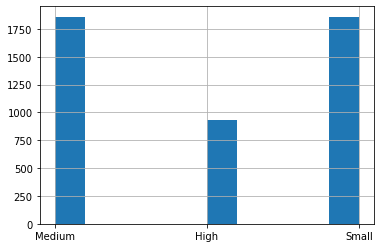

In [ ]:
df['Outlet_Size'].hist()

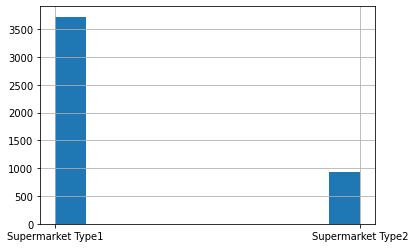

In [ ]:
df['Outlet_Type'].hist()

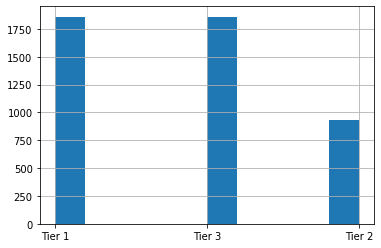

In [ ]:
df['Outlet_Location_Type'].hist()

In [ ]:
df1 = df[['Item_Type', 'Item_Outlet_Sales']]

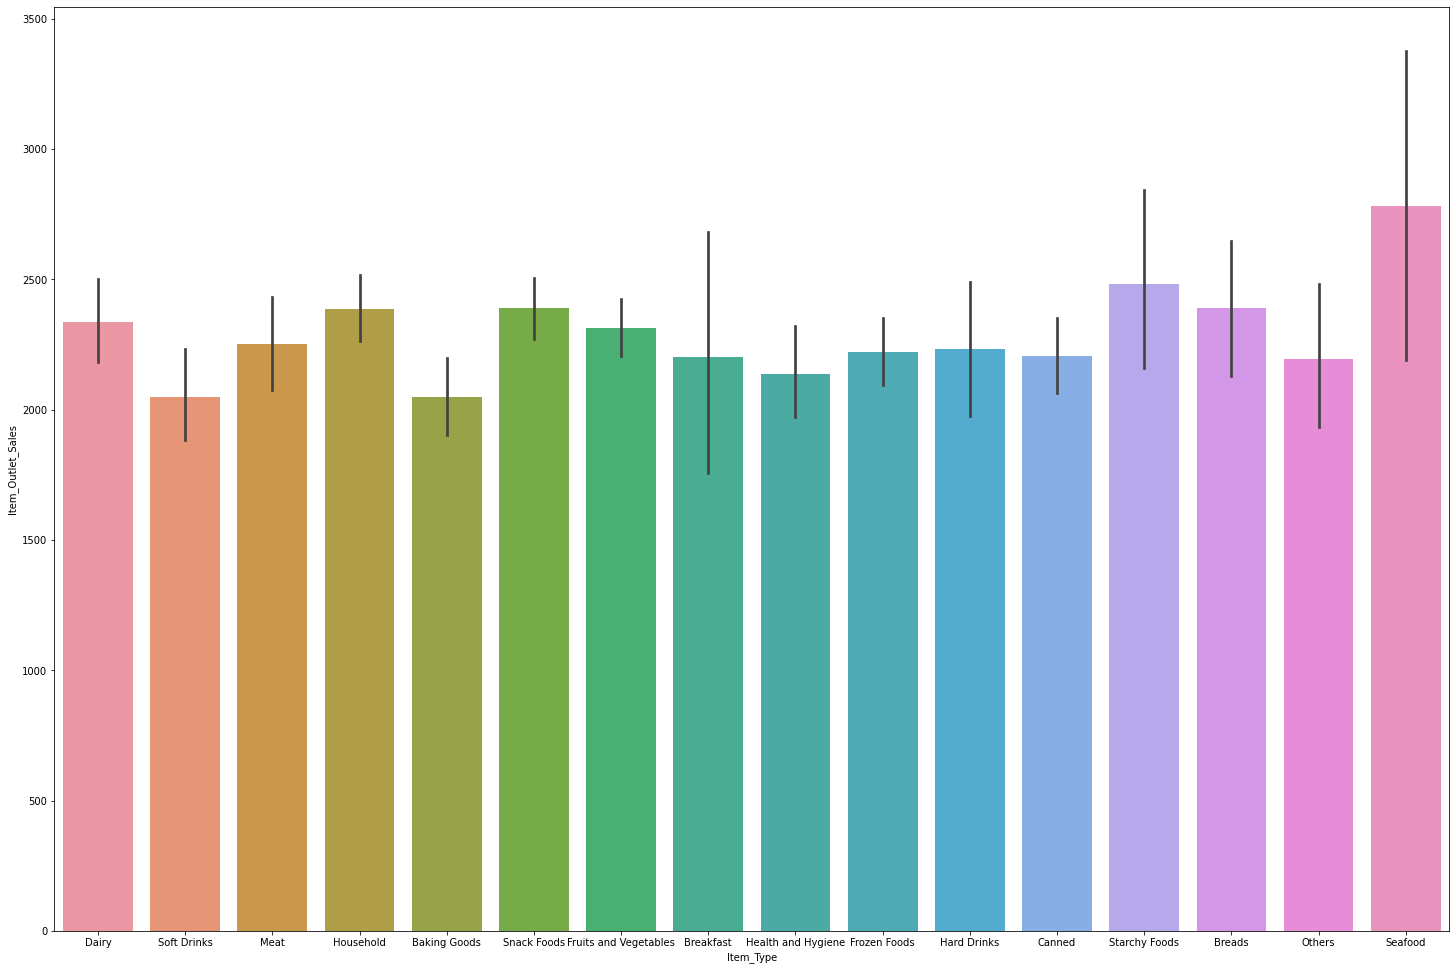

In [ ]:
plt.figure(figsize=(25, 17))
sns.barplot(data=df1, x='Item_Type', y='Item_Outlet_Sales')
plt.savefig('Item Type3')

In [ ]:
df2 = df[['Outlet_Size', 'Item_Outlet_Sales']]

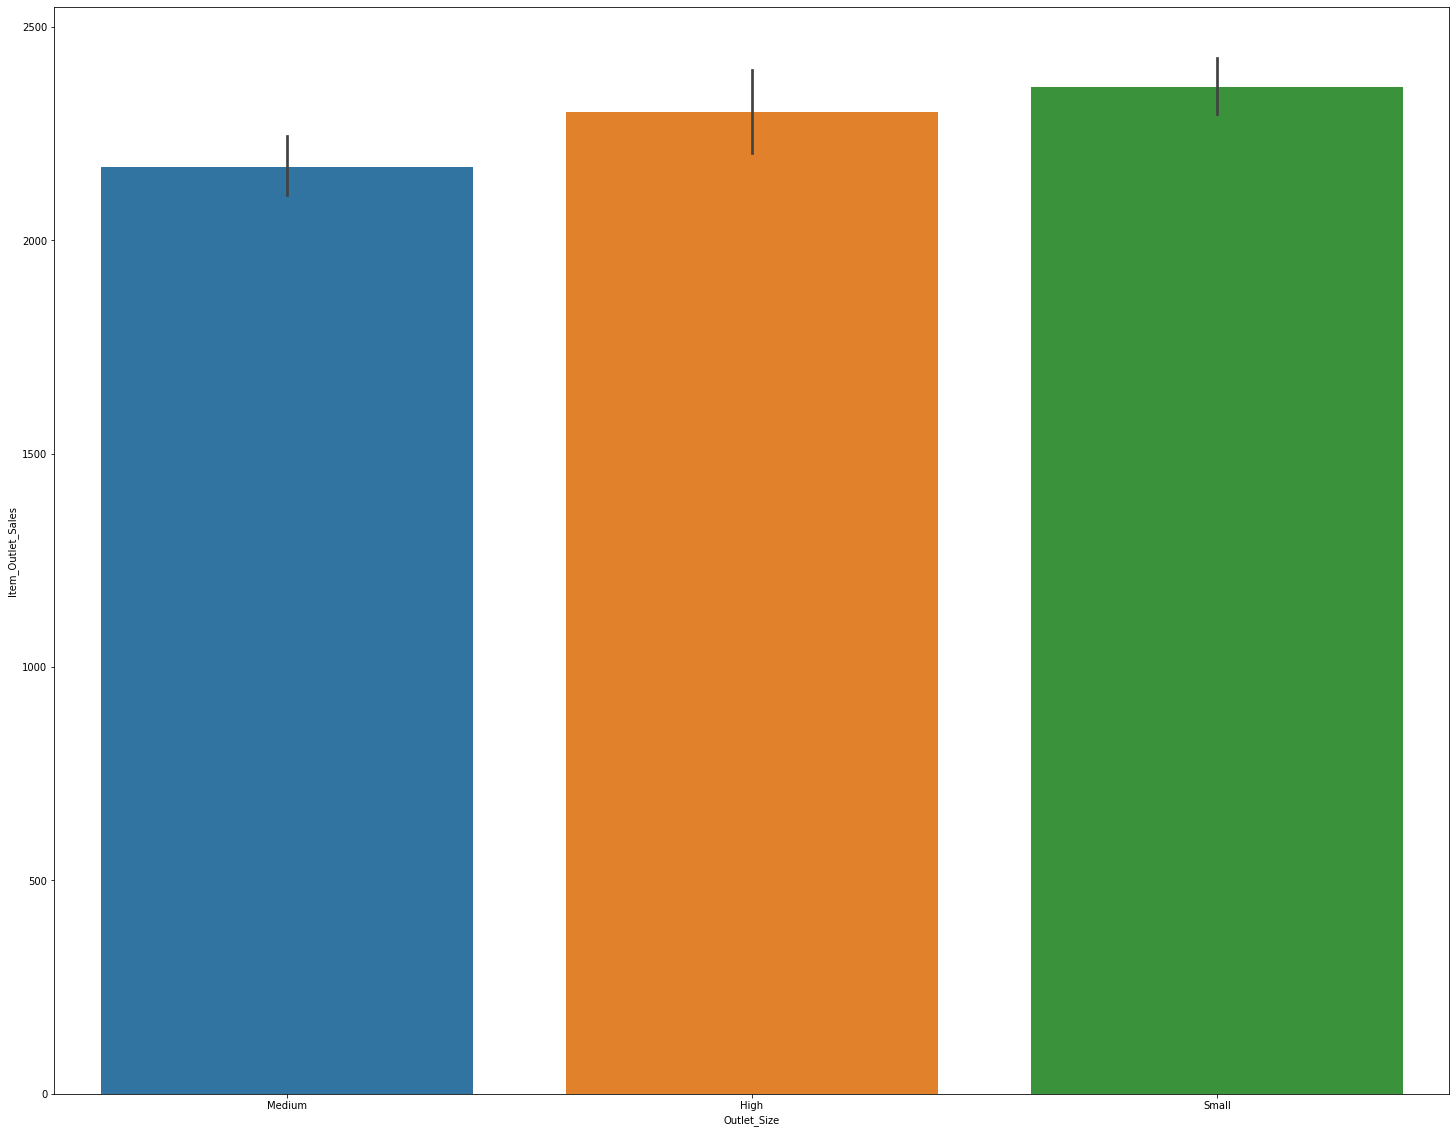

In [ ]:
plt.figure(figsize=(25, 20))
sns.barplot(data=df2, x='Outlet_Size', y='Item_Outlet_Sales')
plt.savefig('Outlet Size')

In [ ]:
df3 = df[['Outlet_Type', 'Item_Outlet_Sales']]

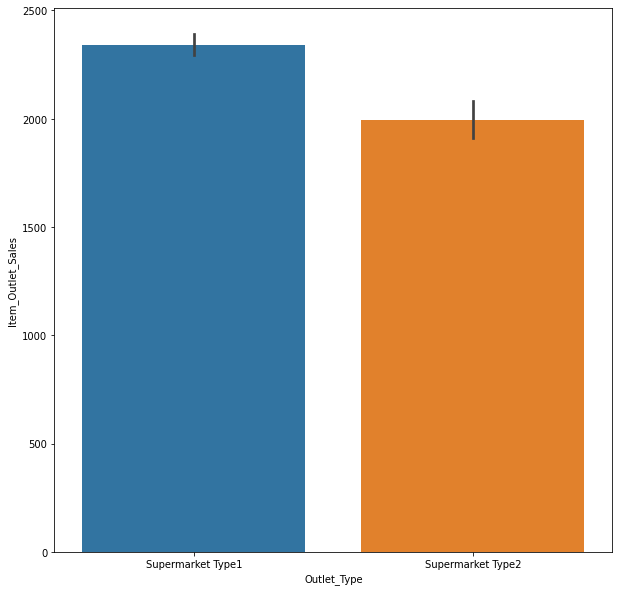

In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(data=df3, x='Outlet_Type', y='Item_Outlet_Sales')
plt.savefig('Outlet Type')

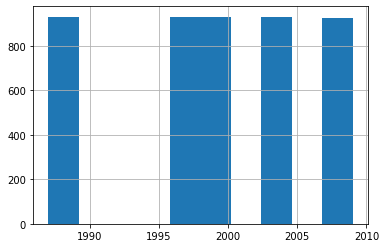

In [ ]:
df['Outlet_Establishment_Year'].hist()
 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


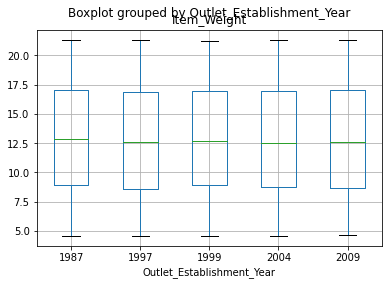

In [ ]:

df.boxplot(column = 'Item_Weight', by = 'Outlet_Establishment_Year');


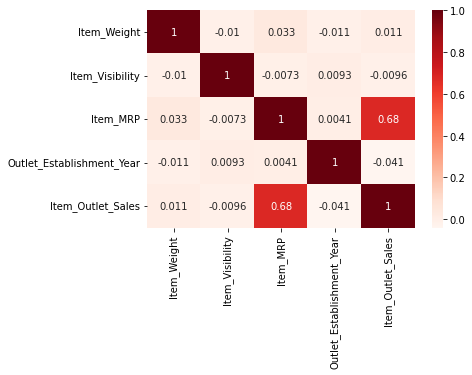

In [ ]:
import seaborn as sns
import matplotlib as plt
corr = df.corr()
sns.heatmap(corr,cmap='Reds', annot=True)

In [ ]:
df1 = df[['Outlet_Type', 'Item_Outlet_Sales']]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import set_config
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error



In [ ]:
set_config(display='diagram')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   object 
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 472.3+ KB


In [ ]:
# The target we are trying to predict
y = df['Item_Outlet_Sales']
# The features we will use to make the prediction

X = df.drop(columns = ['Item_Identifier', 'Item_Outlet_Sales'])

In [ ]:
# Import the TTS from sklearn
from sklearn.model_selection import train_test_split
# Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [ ]:
#We will select columns based on datatype.  
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')
#num_data = X_train [num_selector(X_train)]
#cat_data = X_train [cat_selector(X_train)]


In [ ]:
#Instantiate all the Transformers
#We will use two simple imputers, the scaler, and the one hot encoder.

mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()
ohe_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')



In [ ]:
cat_selector = make_column_selector(dtype_include= 'object')
num_selector = make_column_selector(dtype_include= 'number')

In [ ]:
# This is the pipeline for numeric columns
num_pipe = make_pipeline(mean_imputer, scaler)

In [ ]:
# This is the pipeline for categorical columns
cat_pipe = make_pipeline(freq_imputer, ohe_encoder)

In [ ]:
#Match columns with the appropriate pre-processing pipeline
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

In [ ]:
#Add matching pairs to the Column Transformer
column_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')



In [ ]:
fit_transformer = column_transformer.fit_transform(X_train)

In [ ]:
# Make a linear regression instance
reg = LinearRegression()



In [ ]:
pipe = make_pipeline(column_transformer, reg)



In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f07ae3816d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f07ae381490>)])),
                ('linearregression', LinearRegression())])

In [ ]:
training_preds = pipe.predict(X_train)

In [ ]:
training_mae = mean_absolute_error(y_train, training_preds)


In [ ]:
test_preds = pipe.predict(X_test)

testing_mae = mean_absolute_error(y_test, test_preds)

print(f'MAE of the test set is {testing_mae:.2f} for Outlet Sales')

MAE of the test set is 786.60 for Outlet Sales


In [ ]:
pipe.score(X_train, y_train)

0.46797145654047323

In [ ]:
pipe.score(X_test, y_test)

0.4845266531765974

In [ ]:
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
preprocessing_pipeline = make_pipeline(mean_imputer, scaler)
preprocessing_pipeline



Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
# Instantiate the model you want to use
lin_reg = LinearRegression()
# Create a pipeline that includes the preprocessing_pipeline created above AND the model
pipe = make_pipeline(preprocessing_pipeline, lin_reg)
pipe

# Instantiate regression estimator
lin_reg = LinearRegression()
# combine into a pipeline
pipe = make_pipeline(column_transformer, lin_reg)
pipe



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f07ae3816d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f07ae381490>)])),
                ('linearregression', LinearRegression())])

In [ ]:
# fit pipeline
pipe.fit(X_train, y_train)
# evaluate model
print(f'Train R2: {r2_score(y_train, pipe.predict(X_train))}')
print(f'Test R2: {r2_score(y_test, pipe.predict(X_test))}')



Train R2: 0.46797145654047323
Test R2: 0.4845266531765974


In [ ]:

df = df.replace(r'^\s*$', np.nan, regex=True) 


In [ ]:
from sklearn.linear_model import LinearRegression



In [ ]:
# Make a linear regression instance
reg = LinearRegression()



In [ ]:

pipe.fit(X_train,y_train)



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f07ae3816d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f07ae381490>)])),
                ('linearregression', LinearRegression())])

In [ ]:
preds = pipe.predict(X_train)

In [ ]:
r2_score(y_train, preds)


0.46797145654047323

In [ ]:
training_mae = mean_absolute_error(y_train, preds)

In [ ]:
print(training_mae)

808.0937260682535


In [ ]:
preds2 = pipe.predict(X_test)

In [ ]:
r2_score(y_test, preds2)


0.4845266531765974

In [ ]:
testing_mae = mean_absolute_error(y_test, preds2)

In [ ]:
print(testing_mae)

786.6008254514187


In [ ]:
#Evaluating the performance of your model based on rmse.
np.sqrt(mean_squared_error(y_train, preds))



1094.2856144129348

In [ ]:
np.sqrt(mean_squared_error(y_test, preds2))

1070.0542940066166

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor



In [ ]:


dec_tree = DecisionTreeRegressor(max_depth = 11, random_state = 42)



In [ ]:
pipe2 = make_pipeline(column_transformer, dec_tree)


In [ ]:
pipe2.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f07ae3816d0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f07ae381490>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=11, random_state=42))])

In [ ]:
train_preds = pipe2.predict(X_train,)
test_preds = pipe2.predict(X_test)


In [ ]:
# evaluate the model
train_score = pipe2.score(X_train, y_train)
test_score = pipe2.score(X_test, y_test)
print(train_score)
print(test_score)

0.7415253544037395
0.08908331934592006


In [ ]:
#Overview Of Project
#Based on the data I analyzed  multiple information that could possibly help with increasing store sales
# People would rather A small store than large store 
#People favor seafood the most out of all item types so i would suggest increasing amount of seafood in store
#In addition, they also prefer going to supermarket type 1 than 2 
#Now I prefer the regular linear regression model then the regression tree model just because the testing score was way higher in the linear regression model 
#The linear regression model test score was 0.48452 to whereas the regression tree model was only 0.08908


Overview Of Project
Based on the data I analyzed  multiple information that could possibly help with increasing store sales
 People would rather A small store than large store 
People favor seafood the most out of all item types so i would suggest increasing amount of seafood in store
In addition, they also prefer going to supermarket type 1 than 2 
Now I prefer the regular linear regression model then the regression tree model just because the testing score was way higher in the linear regression model 
The linear regression model test score was 0.48452 to whereas the regression tree model was only 0.08908